**Delhivery Overview**

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating the commerce operating system. They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.

**Business Problem**

Delhivery aims to establish itself as the premier player in the logistics industry. It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.

In this case study, I have done EDA, data preprocessing and cleaning. Using the concepts of feature engineering, extracted meaningful features from the raw data, including datetime manipulation and column splitting. Used the concept of grouping data based on specific keys and then aggregating it. This is a key aspect of data analysis, especially when dealing with time-series data or data with a hierarchical structure. Also performed Hypothesis testing, to validate assumptions and draw insights from data.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('delhivery_data.csv')

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

Originally in our dataset, we have 1 lakh 1 thousand and 40 rows and 24 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [ ]:
#Since we have 5 columns which are unknown fields, we will straight away drop them off
df.drop(['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], axis=1, inplace=True)

In [ ]:
df.shape

(144867, 19)

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
missing_value= pd.DataFrame(
    {
        'missing value': df.isnull().sum(),
        'Percentage': (df.isnull().sum()/len(df))*100
    }
)
missing_value.sort_values(by='Percentage', ascending=False)

,missing value,Percentage
source_name,293,0.202254
destination_name,261,0.180165
data,0,0.000000
start_scan_to_end_scan,0,0.000000
segment_osrm_time,0,0.000000
segment_actual_time,0,0.000000
osrm_distance,0,0.000000
osrm_time,0,0.000000
actual_time,0,0.000000
actual_distance_to_destination,0,0.000000


In [ ]:
#Since most columns have less than 1% missing values, so we can just simply drop them.
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


So, the Null values in the dataset have been handled.

In [ ]:
#df['trip_creation_time']= pd.to_datetime(df['trip_creation_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
#df['od_end_time']= pd.to_datetime(df['od_end_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
#df['od_start_time']= pd.to_datetime(df['od_start_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [ ]:
df['trip_creation_time']=df['trip_creation_time'].str.split('.').apply(lambda x:x[0])
df['od_start_time']=df['od_start_time'].str.split('.').apply(lambda x:x[0])
df['od_end_time']=df['od_end_time'].str.split('.').apply(lambda x:x[0])

In [ ]:
df['trip_creation_time']= pd.to_datetime(df['trip_creation_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['od_start_time']= pd.to_datetime(df['od_end_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['od_end_time']= pd.to_datetime(df['od_start_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,2018-09-20 04:47:45,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,2018-09-20 04:47:45,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,2018-09-20 04:47:45,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,2018-09-20 04:47:45,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,2018-09-20 04:47:45,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [ ]:
df.duplicated().sum()

0

There are no duplicates in the entire dataset.

In [ ]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:08.956789248,2018-09-23 09:36:53.558066944,2018-09-23 09:36:53.558066944,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
min,2018-09-12 00:00:16,2018-09-12 00:50:10,2018-09-12 00:50:10,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 02:46:11,2018-09-18 01:29:56,2018-09-18 01:29:56,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,2018-09-22 03:36:19,2018-09-23 02:49:00,2018-09-23 02:49:00,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,2018-09-27 17:53:19,2018-09-28 12:13:41,2018-09-28 12:13:41,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,2018-10-03 23:59:42,2018-10-08 03:00:24,2018-10-08 03:00:24,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700
std,NaN,NaN,NaN,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367


In [ ]:
round((df['data'].value_counts()/len(df))*100,2)

,count
data,
training,72.5
test,27.5


Approximately 72% is training data and 28% is test data.

In [ ]:
round((df['route_type'].value_counts()/len(df))*100,2)

,count
route_type,
FTL,68.69
Carting,31.31


Approximately, 69% transportation type is FTL(Full Truck Load) and 31% is Carting.

In [ ]:
df['source_name'].nunique()

1496

There are 1496 unique source name of trip origin i.e. from where the trip starts.

In [ ]:
df['destination_name'].nunique()

1466

There are 1466 unique destination names i.e. where the trip ends.

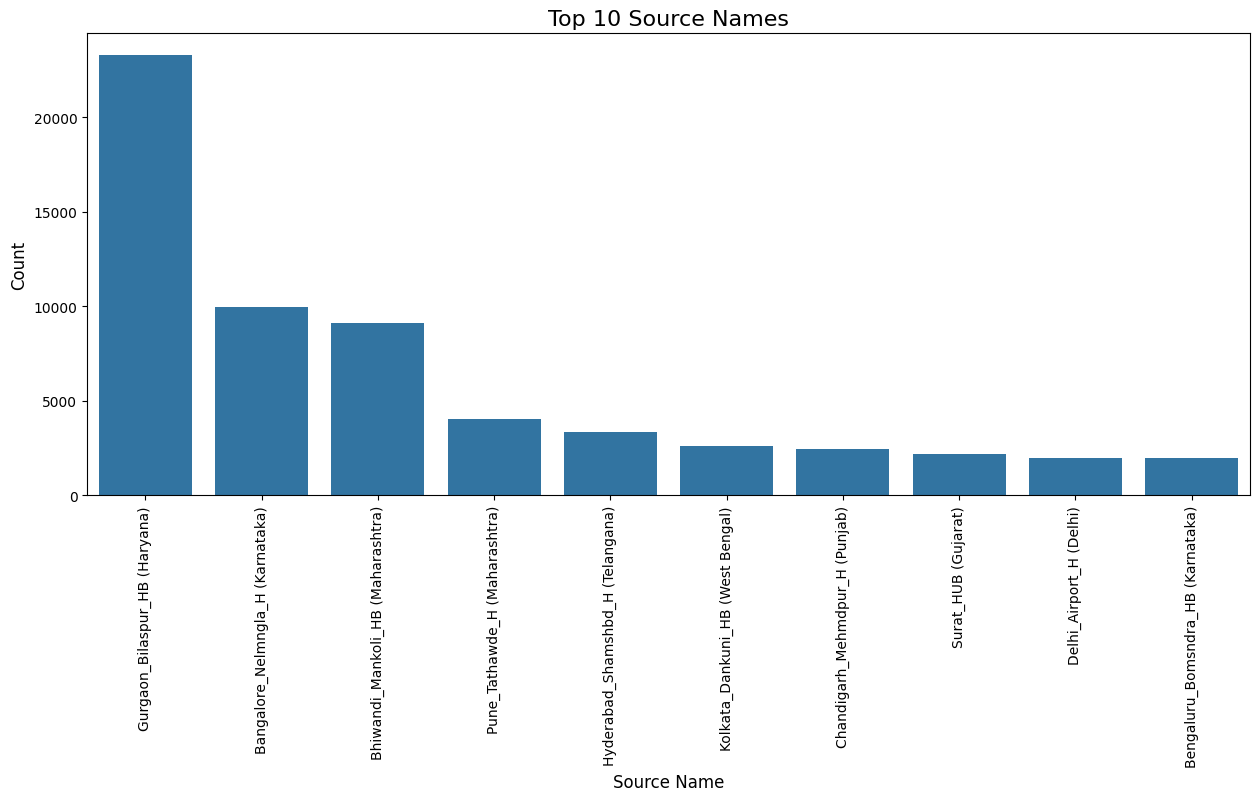

In [ ]:
top_10_source_names = df['source_name'].value_counts().head(10).reset_index()
top_10_source_names.columns=['source_name', 'count']
plt.figure(figsize=(15, 6))
sns.barplot(x='source_name', y='count', data=top_10_source_names)
plt.title('Top 10 Source Names', fontsize=16)
plt.xlabel('Source Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

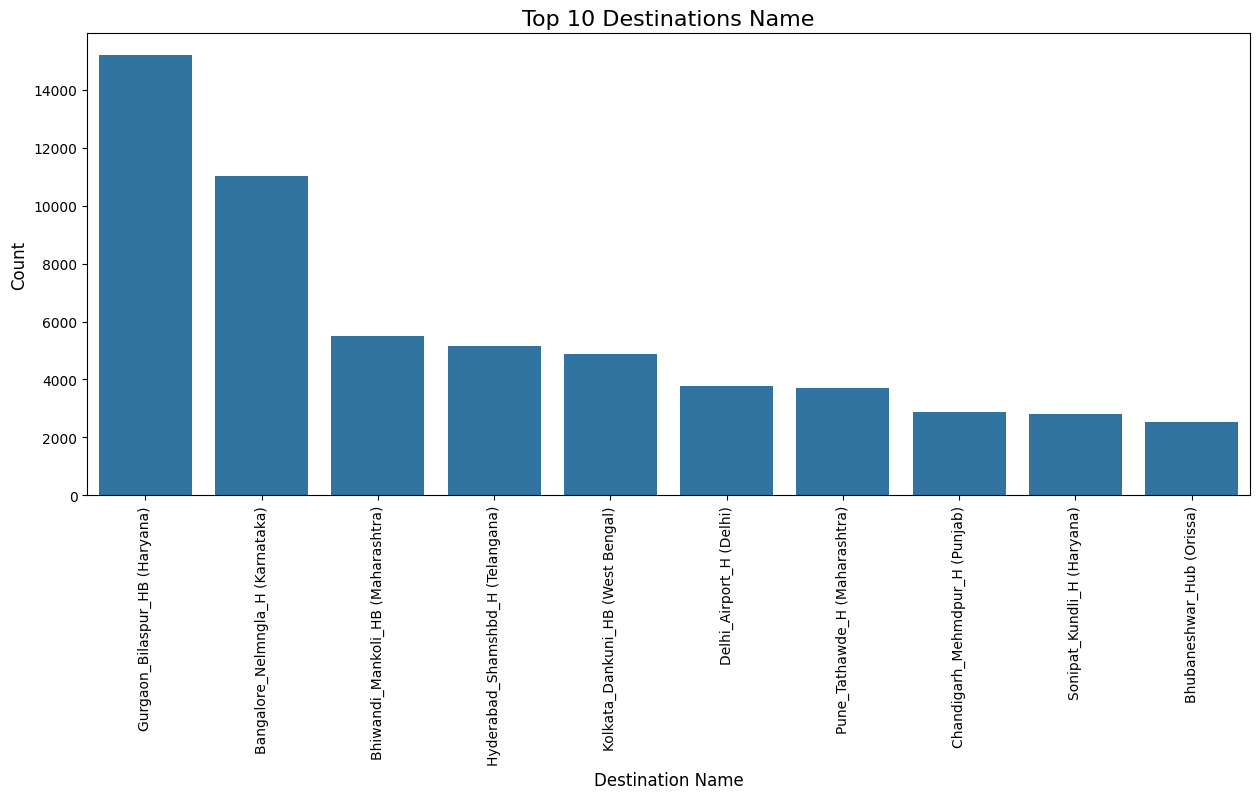

In [ ]:
top_10_destination_names = df['destination_name'].value_counts().head(10).reset_index()
top_10_destination_names.columns=['destination_name', 'count']
plt.figure(figsize=(15, 6))
sns.barplot(x='destination_name', y='count', data=top_10_destination_names)
plt.title('Top 10 Destinations Name', fontsize=16)
plt.xlabel('Destination Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

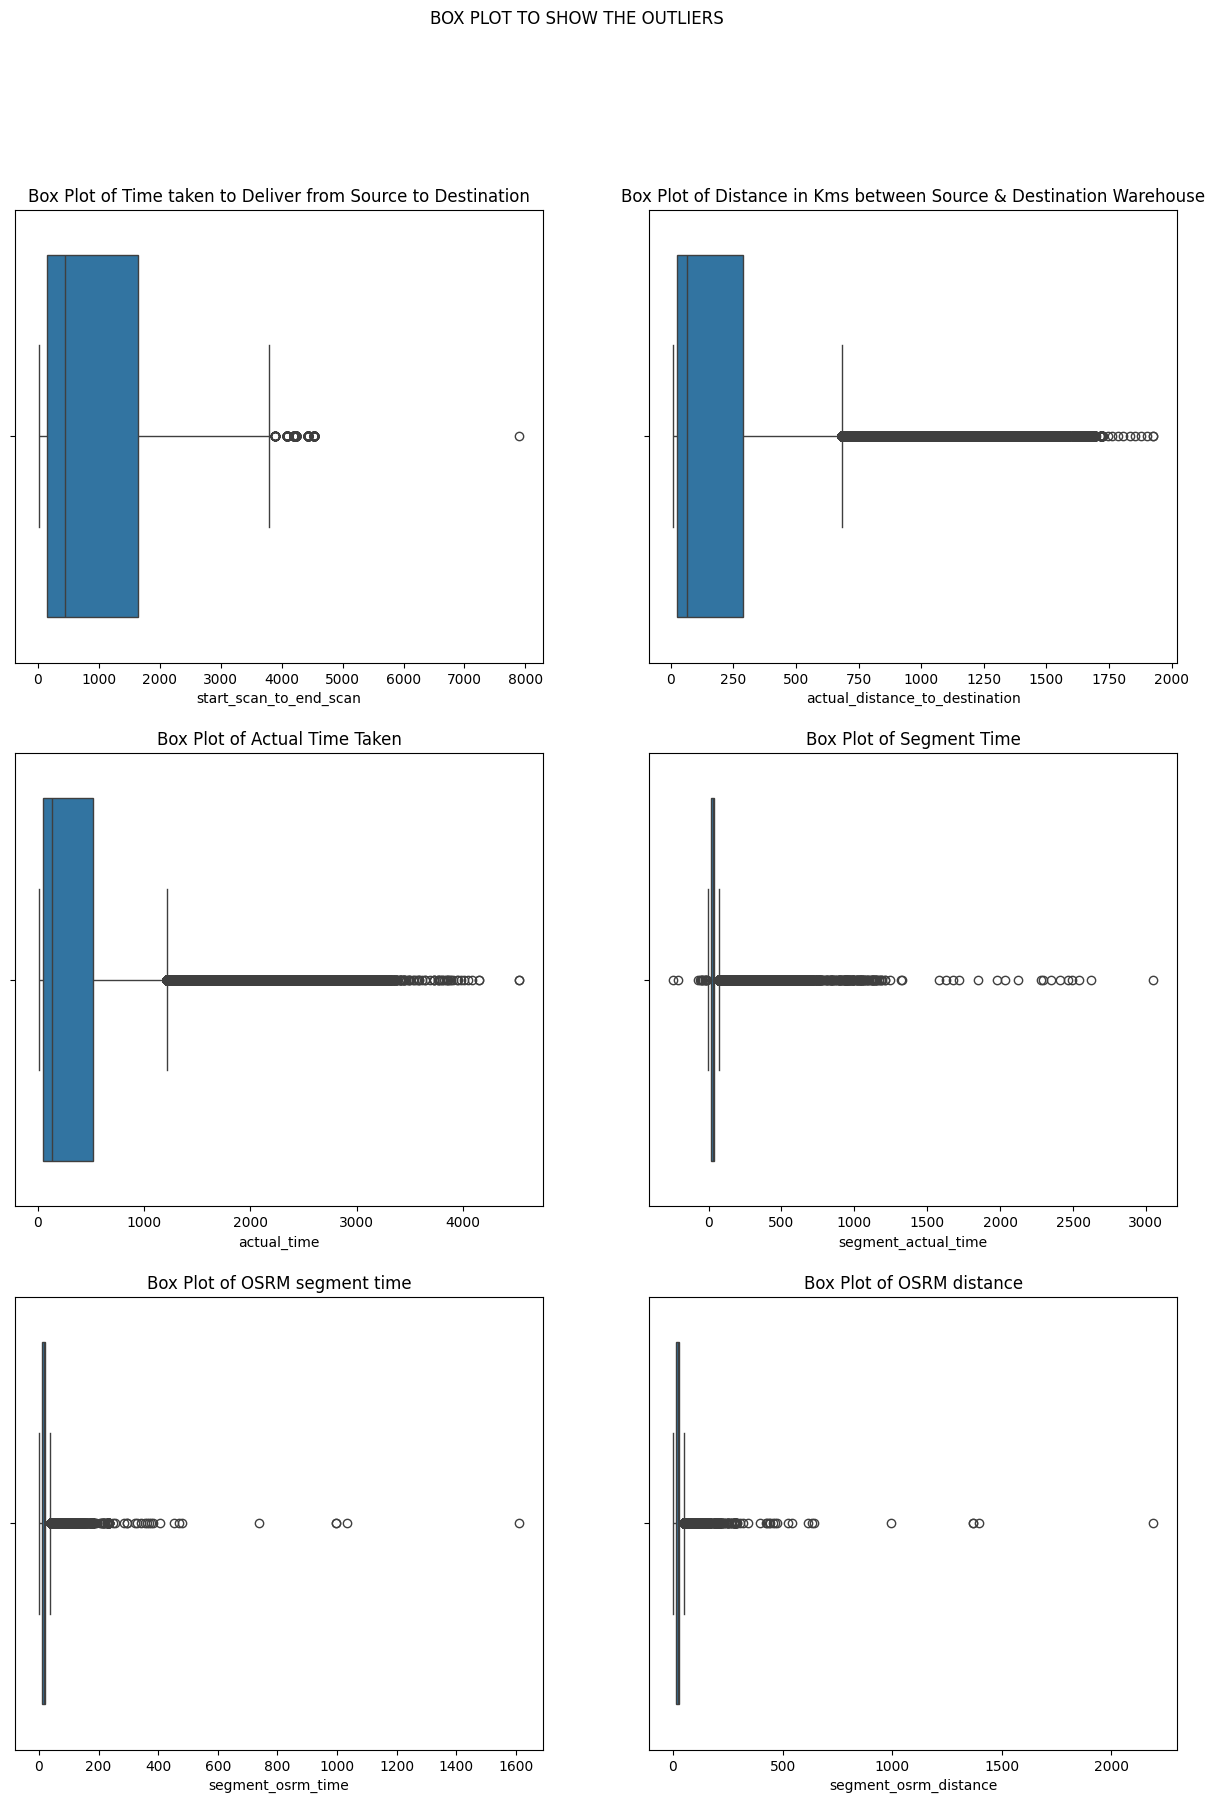

In [ ]:
#plt.suptitle("BoxPlot to detect the Outliers")
fig,axs= plt.subplots(nrows=3, ncols=2, figsize=(15,20))
plt.suptitle("BOX PLOT TO SHOW THE OUTLIERS")
custom_palette = ['#FF6347', '#4682B4', '#32CD32']

sns.boxplot(data=df, x='start_scan_to_end_scan', ax=axs[0,0])
axs[0, 0].set_title('Box Plot of Time taken to Deliver from Source to Destination')
sns.boxplot(data=df, x='actual_distance_to_destination', ax=axs[0,1])
axs[0, 1].set_title('Box Plot of Distance in Kms between Source & Destination Warehouse')
sns.boxplot(data=df, x='actual_time', ax=axs[1,0])
axs[1, 0].set_title('Box Plot of Actual Time Taken')
sns.boxplot(data=df, x='segment_actual_time', ax=axs[1,1])
axs[1, 1].set_title('Box Plot of Segment Time')
sns.boxplot(data=df, x='segment_osrm_time', ax=axs[2,0])
axs[2, 0].set_title('Box Plot of OSRM segment time')
sns.boxplot(data=df, x='segment_osrm_distance', ax=axs[2,1])
axs[2, 1].set_title('Box Plot of OSRM distance')
plt.show()

**Insights:**

* Box Plot of column 'start_scan_to_end_scan' which tells us 'Time taken to deliver from source to destination' shows some outliers, indicates delay due to operational inefficiencies, route issues or external factors like traffic/ weather conditions.
* Outliers for column 'actual_distance_to_destination' indicates that certain deliveries are covering significantly longer distances than usual. This may highlight inefficiencies in route planning. Long distances could be affecting the time and cost of deliveries, and re-evaluating the route structure might optimize efficiency.
* Outliers in the actual_time (cumulative time taken to complete delivery) suggest inconsistent delivery durations, likely caused by factors such as inefficiencies in the delivery process, route deviations, or delays, indicating the need for process optimization and better control over time management in deliveries.
* Outliers in the segment_actual_time indicate variability or inefficiencies in specific segments of the delivery process, pointing to delays in certain stages, which may require targeted optimization of individual delivery segments for smoother overall operations.
* Outliers in the segment_osrm_time suggest discrepancies between the predicted OSRM (Open Source Routing Machine) times and actual segment times, highlighting potential inaccuracies in route prediction or unanticipated delays, indicating a need to improve route estimations or investigate causes of deviation from expected timings.
* Outliers in the segment_osrm_distance indicate significant variations in the predicted distances for delivery segments, suggesting potential issues with route accuracy, deviations signaling the need to optimize route planning and improve accuracy in distance predictions.


In [ ]:
df['segment_key']= df['trip_uuid'].astype(str)+'_'+df['source_center'].astype(str)+'_'+df['destination_center'].astype(str)

In [ ]:
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum']= df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time'].cumsum()

In [ ]:
df.head(25)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
5,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 06:36:55,...,15.0,11.0,12.1171,15.0,11.0,12.1171,trip-153741093647649320_IND388620AAB_IND388320AAA,15.0,12.1171,11.0
6,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 06:36:55,...,44.0,17.0,21.2890,28.0,6.0,9.1719,trip-153741093647649320_IND388620AAB_IND388320AAA,43.0,21.2890,17.0
7,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 06:36:55,...,65.0,29.0,35.8252,21.0,11.0,14.5362,trip-153741093647649320_IND388620AAB_IND388320AAA,64.0,35.8252,28.0
8,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 06:36:55,...,76.0,39.0,47.1900,10.0,10.0,11.3648,trip-153741093647649320_IND388620AAB_IND388320AAA,74.0,47.1900,38.0
9,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 06:36:55,...,102.0,45.0,53.2334,26.0,6.0,6.0434,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0


In [ ]:
create_segment_dict={
    #keeping first value for categorical and identifier columns
    'data':'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'trip_uuid': 'first',
    'source_center': 'first',
    'source_name':'first',
    'destination_center':'first',
    'destination_name':'first',
    'od_start_time':'first',
    'od_end_time':'first',
    'segment_key':'first',

    #aggregating numerical columns
    'start_scan_to_end_scan':'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',

    # Columns already aggregated
    'segment_actual_time_sum': 'first',
    'segment_osrm_distance_sum': 'first',
    'segment_osrm_time_sum': 'first'
}

In [ ]:
aggregated_df= df.groupby('segment_key').agg(create_segment_dict)

In [ ]:
aggregated_df=aggregated_df.drop(columns=['segment_key'])

In [ ]:
aggregated_df=aggregated_df.reset_index()

In [ ]:
sorted_df=aggregated_df.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True])

In [ ]:
sorted_df

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,3778.765471,6484.0,3464.0,4540.1261,728.0,534.0,670.6205,50.0,38.0620,33.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,5082.046634,9198.0,4323.0,6037.6386,820.0,474.0,649.8528,43.0,55.2597,39.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,53.310332,96.0,55.0,60.3157,46.0,26.0,28.1995,18.0,10.8633,10.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,186.897974,303.0,155.0,209.1151,95.0,39.0,55.9899,14.0,10.3544,8.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,1725.590250,2601.0,1427.0,1975.7409,608.0,231.0,317.7408,36.0,27.2834,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,88.326510,119.0,106.0,106.7084,49.0,42.0,42.1431,9.0,10.0527,10.0
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,90.049767,173.0,108.0,111.8555,89.0,77.0,78.5869,15.0,14.7197,13.0
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,21.672374,51.0,22.0,25.5371,29.0,14.0,16.0184,21.0,9.5186,8.0
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,62.547507,278.0,59.0,76.5169,233.0,42.0,52.5303,45.0,23.9866,17.0


# **# FEATURE ENGINEERING**

In [ ]:
df[['od_start_time', 'od_end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   od_start_time  144316 non-null  datetime64[ns]
 1   od_end_time    144316 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.3 MB


In [ ]:
df['od_time_diff_hour']=(df['od_end_time']-df['od_start_time']).dt.total_seconds()/3600

In [ ]:
df['od_time_diff_hour'].value_counts()

,count
od_time_diff_hour,
0.0,144316


In [ ]:
df.drop(columns=['od_end_time', 'od_start_time'], inplace=True)

In [ ]:
df['destination_name'].str.split('_')

,destination_name
0,"[Khambhat, MotvdDPP, D (Gujarat)]"
1,"[Khambhat, MotvdDPP, D (Gujarat)]"
2,"[Khambhat, MotvdDPP, D (Gujarat)]"
3,"[Khambhat, MotvdDPP, D (Gujarat)]"
4,"[Khambhat, MotvdDPP, D (Gujarat)]"
...,...
144862,"[Gurgaon, Bilaspur, HB (Haryana)]"
144863,"[Gurgaon, Bilaspur, HB (Haryana)]"
144864,"[Gurgaon, Bilaspur, HB (Haryana)]"
144865,"[Gurgaon, Bilaspur, HB (Haryana)]"


In [ ]:
df['destination_city']=df['destination_name'].str.split('_').apply(lambda city:city[0])
df['destination_place_code']=df['destination_name'].str.extract(r'^[^_]+_(.*) \(')
df['destination_state']=df['destination_name'].str.split('(').apply(lambda state:state[1]).str.split(')').apply(lambda dummy:dummy[0])

In [ ]:
df['source_city']=df['source_name'].str.split('_').apply(lambda city:city[0])
df['source_place_code']=df['source_name'].str.extract(r'^[^_]+_(.*) \(')
df['source_state']=df['source_name'].str.split('(').apply(lambda state:state[1]).str.split(')').apply(lambda dummy:dummy[0])

In [ ]:
df['trip_creation_day']=df['trip_creation_time'].dt.day
df['trip_creation_month']=df['trip_creation_time'].dt.month
df['trip_creation_year']=df['trip_creation_time'].dt.year

In [ ]:
create_trip_dict={
    'data':'first',
     'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_actual_time_sum': 'first',
    'segment_osrm_distance_sum': 'first',
    'segment_osrm_time_sum': 'first'
}

In [ ]:
trip_level_df=aggregated_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()

In [ ]:
trip_level_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-13 13:40:23,...,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733,50.0,38.0620,33.0
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 03:01:59,...,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894,18.0,10.8633,10.0
2,trip-153671043369099517,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 17:34:55,...,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678,36.0,27.2834,19.0
3,trip-153671046011330457,training,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 01:41:29,...,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766,23.0,11.9675,9.0
4,trip-153671052974046625,training,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 02:34:10,...,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919,42.0,23.8920,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND140603AAA,Zirakpur_DC (Punjab),2018-10-04 02:28:43,...,141.057373,186.0,148.0,162.9473,82.0,62.0,64.8551,12.0,9.3059,6.0
14783,trip-153861104386292051,test,2018-10-03 23:57:23,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-04 00:57:59,...,25.130640,33.0,19.0,26.5333,21.0,11.0,16.0883,12.0,10.4451,7.0
14784,trip-153861106442901555,test,2018-10-03 23:57:44,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-04 06:59:51,...,93.743842,549.0,134.0,162.8499,281.0,88.0,104.8866,14.0,11.9976,8.0
14785,trip-153861115439069069,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628801AAA,Eral_Busstand_D (Tamil Nadu),2018-10-04 01:44:53,...,355.281673,600.0,446.0,449.5383,258.0,221.0,223.5324,18.0,11.9050,13.0


* Aggregating data at the trip level can provide valuable insights into the overall performance and characterstics of each trip. Some key insights that can be drawn from this aggregation:
1. **Trip Efficiency:**
* **Total Time and Distance:** By summing up actual_time, osrm_time, actual_distance_to_destination etc. we can assess the total time and distance covered for each trip. This helps in understanding the efficiency of each trip and identifying trips that longer or cover more distance than expected.

* **Comparison of Actual vs OSRM Estimates:**  Comparing actual_time and osrm_time as well as actual_distance_to_destination and osrm_distance, can reveal discrepancies between actual performance and estimated, indicating areas for potential improvement in route planning.
2. **Performance Mertics:**
* **Sum of Segement Metrics:** Aggregating segment_actual_time_sum, segment_osrm_distance_sum and segment_osrm_time_sum helps in evaluating the total performance of each trip based on its segmnets. This can highlight whether certain segmnets are consistently problematic or if certain trips are more efficint overall.
3. **Source and Destination Consistency:**
* **Source and Destination Details:** Aggregating columns like source_center, destination_center, source_name, and destination_name provides a clear view of the most frequent origins and destinations. This can help in identifying popular routes or centers that may need additional resources or attention.





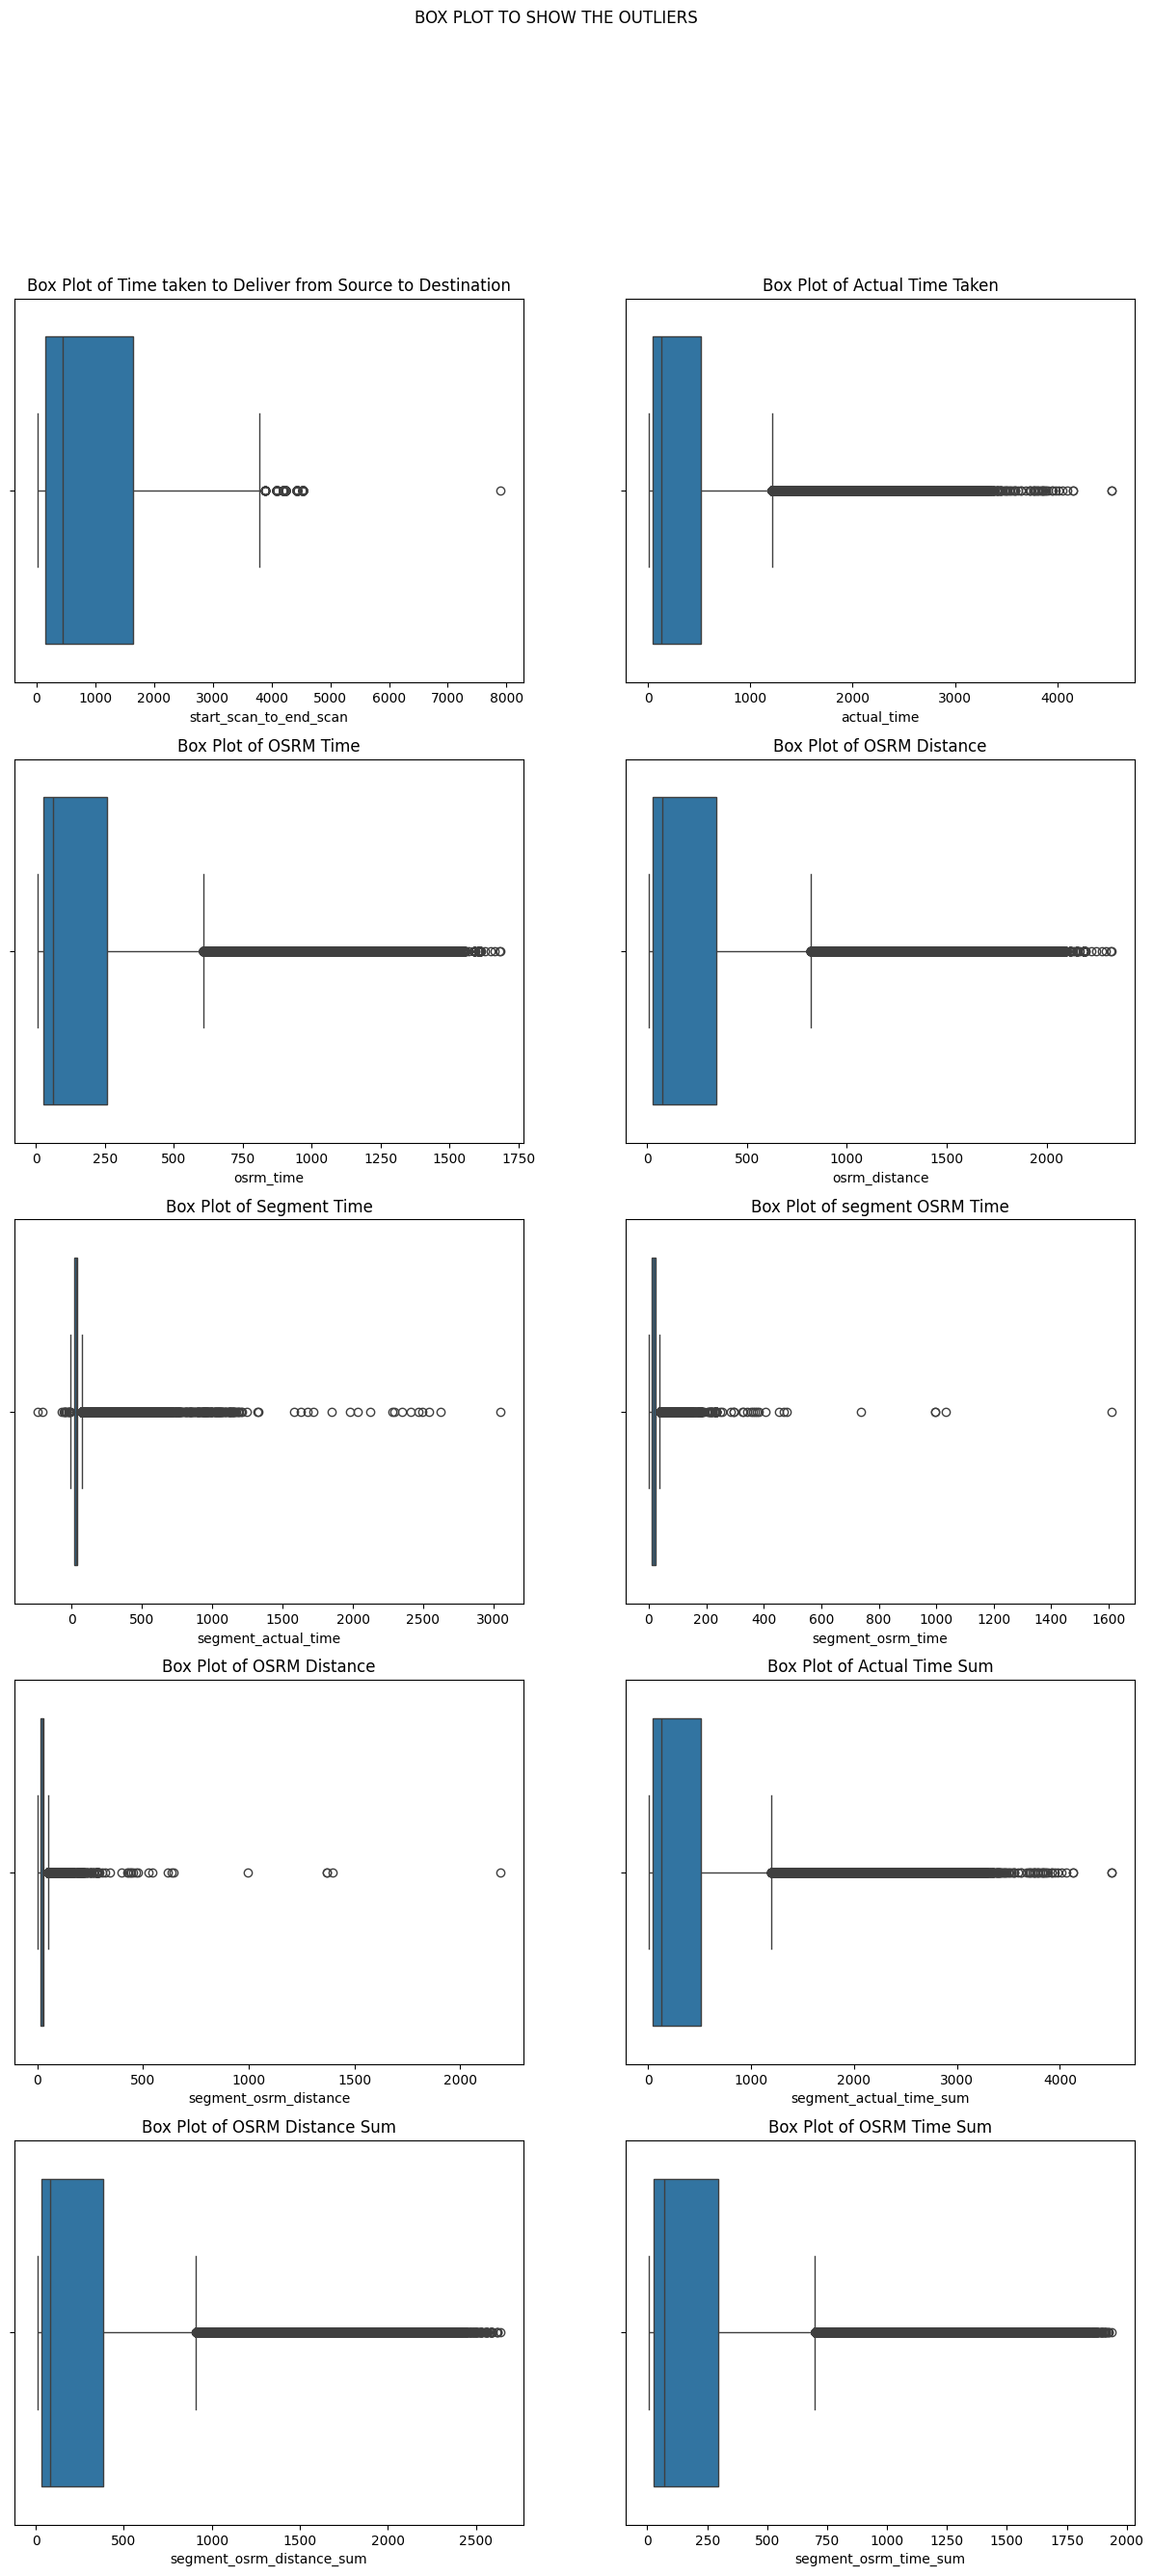

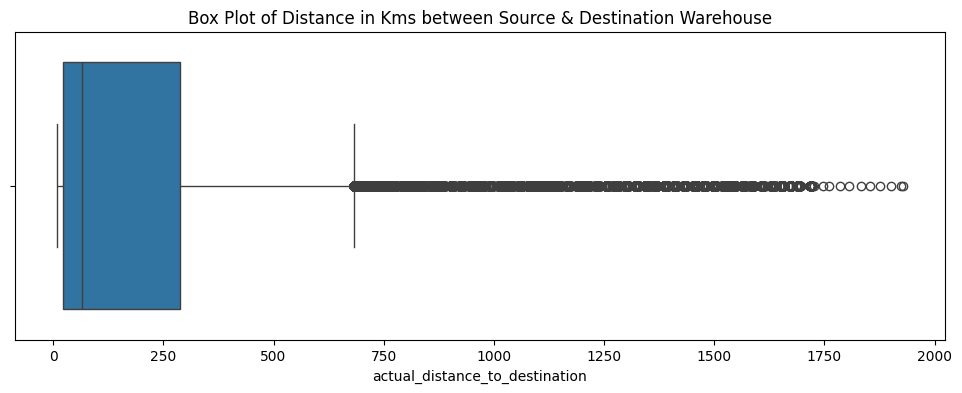

In [ ]:
#columns for outlier detection:

columns= ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum']


#plt.suptitle("BoxPlot to detect the Outliers")
fig,axs= plt.subplots(nrows=5, ncols=2, figsize=(15,30))
plt.suptitle("BOX PLOT TO SHOW THE OUTLIERS")
custom_palette = ['#FF6347', '#4682B4', '#32CD32']

sns.boxplot(data=df, x='start_scan_to_end_scan', ax=axs[0,0])
axs[0, 0].set_title('Box Plot of Time taken to Deliver from Source to Destination')

sns.boxplot(data=df, x='actual_time', ax=axs[0,1])
axs[0, 1].set_title('Box Plot of Actual Time Taken')

sns.boxplot(data=df, x='osrm_time', ax=axs[1,0])
axs[1, 0].set_title('Box Plot of OSRM Time')

sns.boxplot(data=df, x='osrm_distance', ax=axs[1,1])
axs[1, 1].set_title('Box Plot of OSRM Distance')

sns.boxplot(data=df, x='segment_actual_time', ax=axs[2,0])
axs[2, 0].set_title('Box Plot of Segment Time')

sns.boxplot(data=df, x='segment_osrm_time', ax=axs[2,1])
axs[2, 1].set_title('Box Plot of segment OSRM Time')

sns.boxplot(data=df, x='segment_osrm_distance', ax=axs[3,0])
axs[3, 0].set_title('Box Plot of OSRM Distance')

sns.boxplot(data=df, x='segment_actual_time_sum', ax=axs[3,1])
axs[3, 1].set_title('Box Plot of Actual Time Sum')

sns.boxplot(data=df, x='segment_osrm_distance_sum', ax=axs[4,0])
axs[4, 0].set_title('Box Plot of OSRM Distance Sum')

sns.boxplot(data=df, x='segment_osrm_time_sum', ax=axs[4,1])
axs[4, 1].set_title('Box Plot of OSRM Time Sum')
plt.show()

plt.figure(figsize=(12, 4))
ax=sns.boxplot(data=df, x='actual_distance_to_destination')
ax.set_title('Box Plot of Distance in Kms between Source & Destination Warehouse')
plt.show()





In [ ]:
columns_to_handle = [
    'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
    'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
    'segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum'
]

iqr_bounds = {}

for col in columns_to_handle:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR= Q3-Q1
  lower_bound= Q1-1.5*IQR
  upper_bound= Q3+1.5*IQR
  iqr_bounds[col]=(lower_bound, upper_bound)
  print(f'Column: {col}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

  df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

Column: start_scan_to_end_scan, Lower Bound: -2065.0, Upper Bound: 3871.0
Column: actual_distance_to_destination, Lower Bound: -371.59458219734324, Upper Bound: 681.5405110247507
Column: actual_time, Lower Bound: -321.5, Upper Bound: 658.5
Column: osrm_time, Lower Bound: -91.0, Upper Bound: 213.0
Column: osrm_distance, Lower Bound: -79.4293875, Upper Bound: 199.2973125
Column: segment_actual_time, Lower Bound: -19.5, Upper Bound: 72.5
Column: segment_osrm_time, Lower Bound: -10.0, Upper Bound: 38.0
Column: segment_osrm_distance, Lower Bound: -12.100425000000001, Upper Bound: 47.034975
Column: segment_actual_time_sum, Lower Bound: -88.5, Upper Bound: 243.5
Column: segment_osrm_distance_sum, Lower Bound: -46.40820000000001, Upper Bound: 140.7406
Column: segment_osrm_time_sum, Lower Bound: -32.0, Upper Bound: 104.0


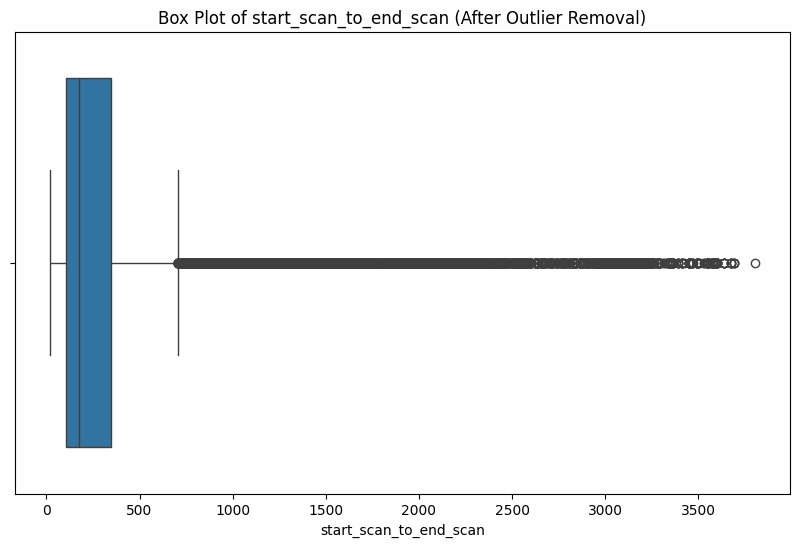

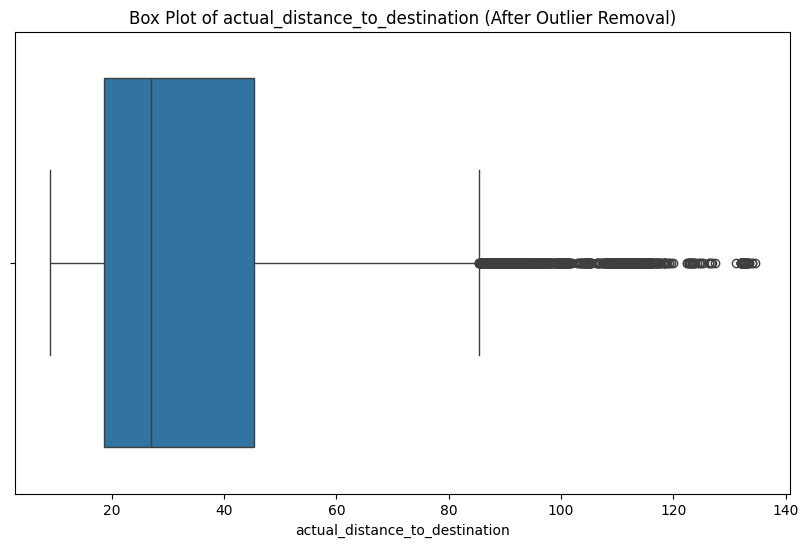

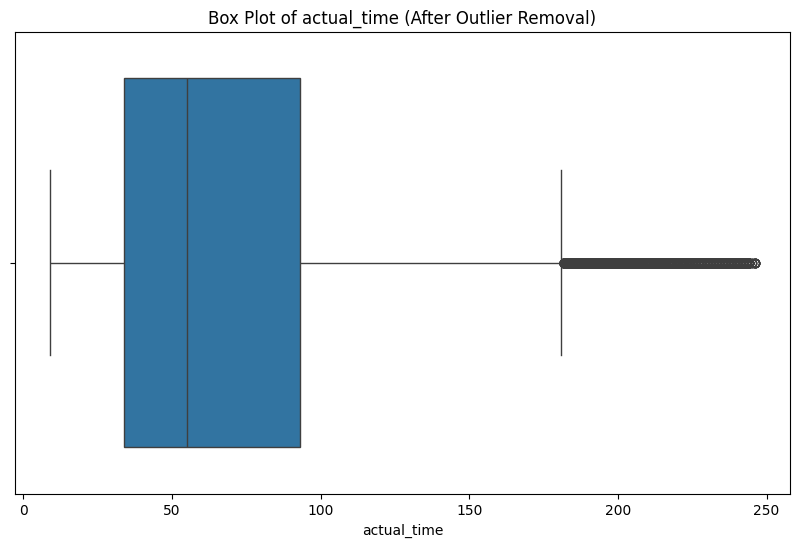

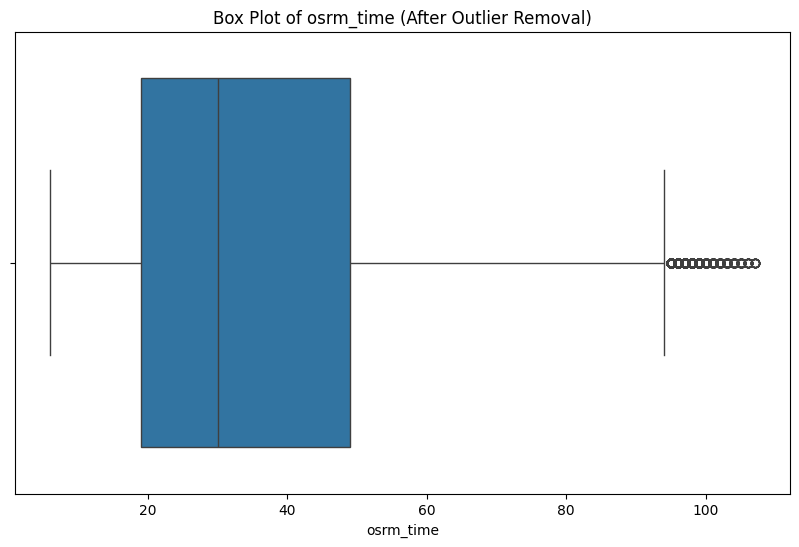

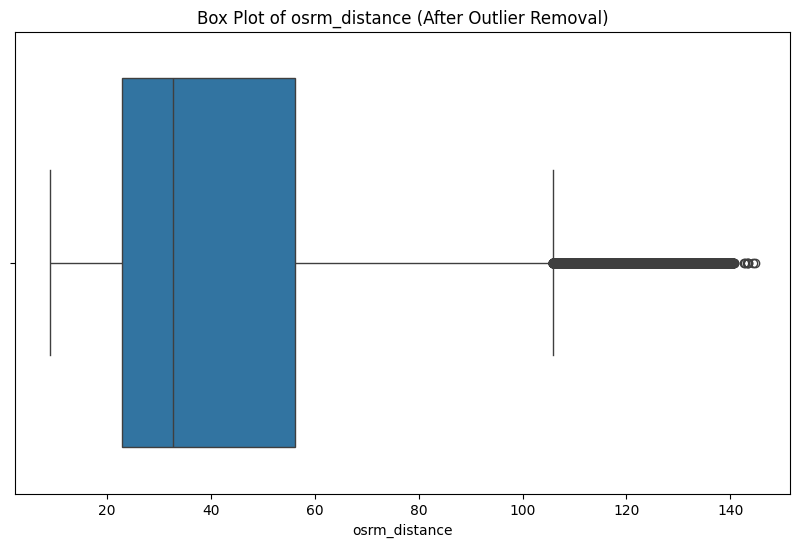

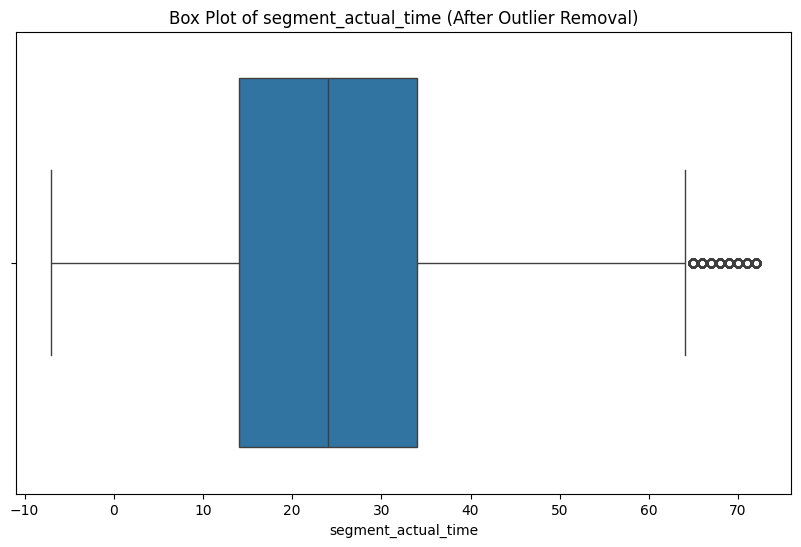

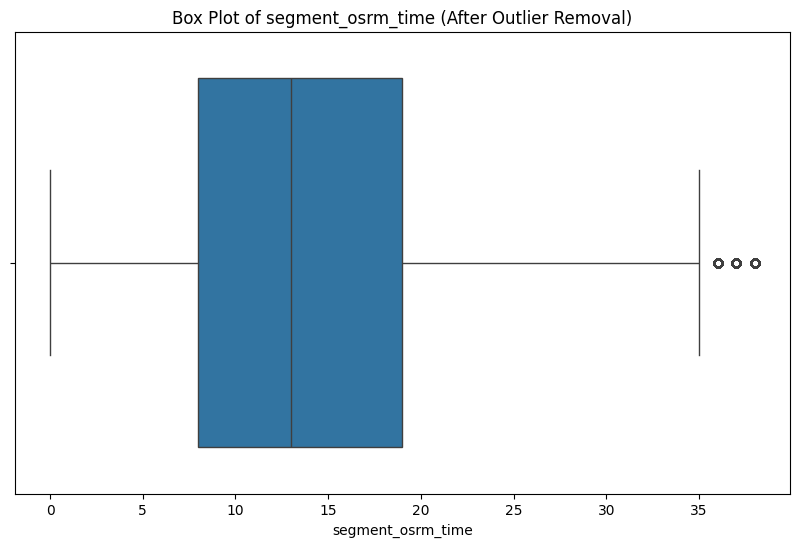

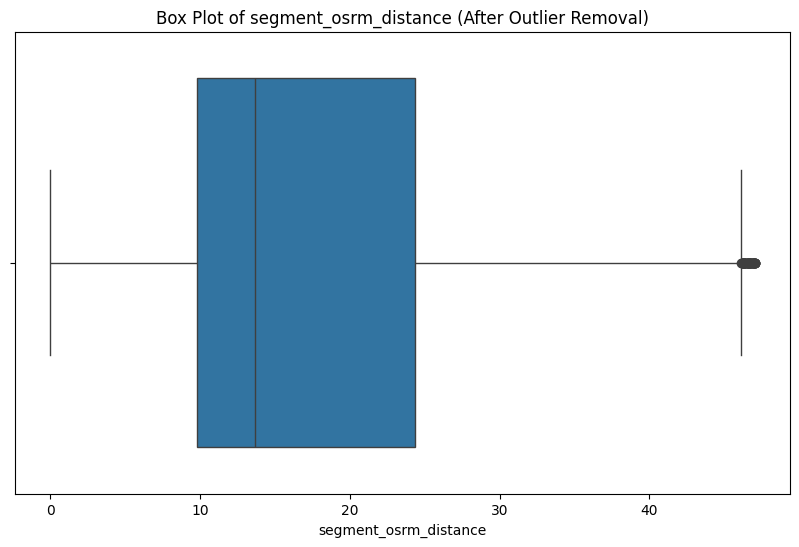

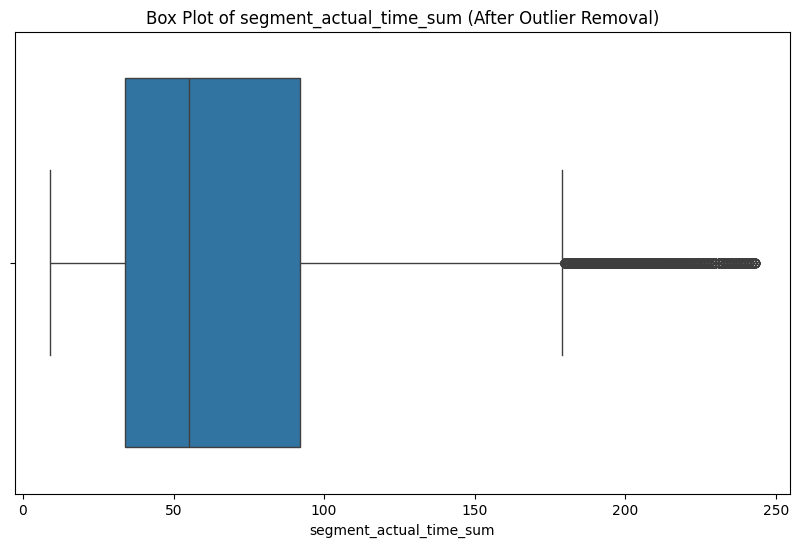

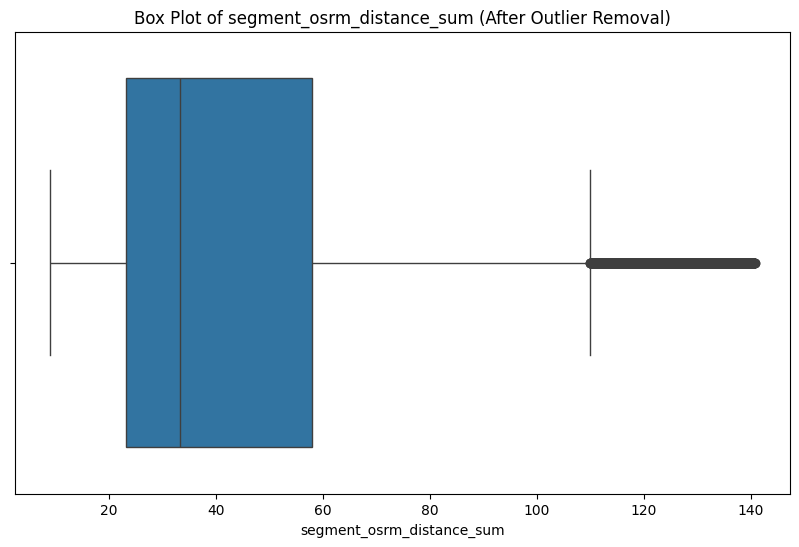

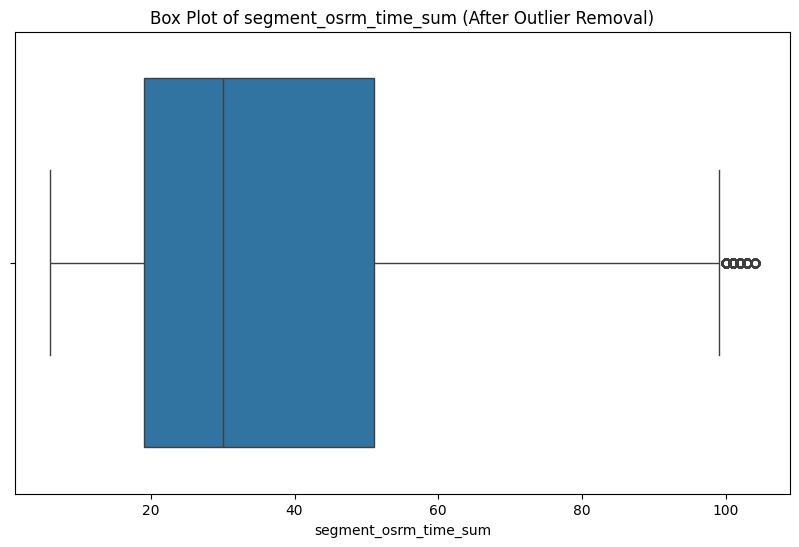

In [ ]:
for col in columns_to_handle:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=df, x=col)
    ax.set_title(f'Box Plot of {col} (After Outlier Removal)')
    plt.show()

In [ ]:
trip_level_df1=trip_level_df.copy()

In [ ]:
cat_cols=['trip_uuid', 'data', 'route_schedule_uuid', 'route_type', 'source_center', 'source_name', 'destination_center', 'destination_name']

df_encoded= pd.get_dummies(trip_level_df1, columns=cat_cols, drop_first=True)

df_encoded.head()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,...,destination_name_Vizianagaram_NcsRd_DC (Andhra Pradesh),destination_name_Vuyyuru_BhogdDPP_D (Andhra Pradesh),destination_name_Wai_Central_DPP_3 (Maharashtra),destination_name_Wanaparthy_VallaDPP_D (Telangana),destination_name_Wankaner_JivanDPP_D (Gujarat),destination_name_Warangal_HunterRd_I (Telangana),destination_name_YamunaNagar_DC (Haryana),destination_name_Yavatmal_JajuDPP_D (Maharashtra),destination_name_Yellandu_Sudimala_D (Telangana),destination_name_Zirakpur_DC (Punjab)
0,2018-09-12 00:00:16,2018-09-13 13:40:23,2018-09-12 16:39:46,43659.0,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,...,False,False,False,False,False,False,False,False,False,False
1,2018-09-12 00:00:22,2018-09-12 03:01:59,2018-09-12 02:03:09,906.0,240.208306,399.0,210.0,269.4308,141.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,2018-09-12 00:00:33,2018-09-14 17:34:55,2018-09-14 03:40:17,248631.0,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,...,False,False,False,False,False,False,False,False,False,False
3,2018-09-12 00:01:00,2018-09-12 01:41:29,2018-09-12 01:41:29,200.0,28.529648,82.0,24.0,31.6475,59.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,2018-09-12 00:02:09,2018-09-12 02:34:10,2018-09-12 03:54:43,1586.0,239.007304,556.0,207.0,266.2914,340.0,115.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
num_cols = [
    'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
    'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
    'segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum'
]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
trip_level_df1[num_cols]= scaler.fit_transform(trip_level_df1[num_cols])


In [ ]:
print(trip_level_df1[num_cols].head())

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                0.109969                        0.104014     0.093341   
1                0.002218                        0.002717     0.002323   
2                0.626566                        0.800858     0.668306   
3                0.000439                        0.000229     0.000435   
4                0.003932                        0.002703     0.003258   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0   0.101122       0.103203             0.247388           0.391712   
1   0.002651       0.002542             0.021218           0.023065   
2   0.854640       0.873362             0.530301           0.756450   
3   0.000234       0.000220             0.008037           0.003909   
4   0.002612       0.002512             0.053207           0.042611   

   segment_osrm_distance  segment_actual_time_sum  segment_osrm_distance_sum  \
0               0.373134                 0.01347

In [ ]:
trip_level_df[['actual_time', 'osrm_time']]

,actual_time,osrm_time
0,15682.0,7787.0
1,399.0,210.0
2,112225.0,65768.0
3,82.0,24.0
4,556.0,207.0
...,...,...
14782,186.0,148.0
14783,33.0,19.0
14784,549.0,134.0
14785,600.0,446.0


In [ ]:
#Hypothesis Formulation:

#Null hypothesis(H0): There is no significant differnce between the aggregated actual time  and aggregared OSRM time i.e. The mean differnce is zero.

#Alternate Hypothesis(Ha): There is a significant difference between the aggregated actual time and the aggregated OSRM time i.e. The mean difference is not zero.

from scipy.stats import ttest_rel

t_stat, p_value= ttest_rel(trip_level_df['actual_time'], trip_level_df['osrm_time'])

print(f'T-statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-statistic: 32.42514605229827
P-Value: 7.093080524136582e-223


In [ ]:
alpha=0.05 #significance level
if p_value<alpha:
  print("Reject the Null Hypothesis i.e. There is a significant difference between aggregated actual time and osrm time.")
else:
  print("Failed to reject the Null Hypothesis i.e. There is no significant difference between aggregated actual time and osrm time.")

Reject the Null Hypothesis i.e. There is a significant difference between aggregated actual time and osrm time.


**Insights:**
* **Operational Inefficiency:** The significant difference between actual time and OSRM-predicted time indicates potential inefficiencies in the delivery process. Factors such as traffic delays, opeartional bottlenecks or route deviations maybe causing the deliveries to take longer than expected.
* **Inaccuracy in OSRM predictions:** The significant difference between actual time and OSRM-predicted time indicates that OSRM model's assumptions about road conditions, speeds, traffic or travel time might not be fully alligned with real world scenarios. Thus, there is a need for model update or calibration.
* **Impact on Customer Satisfaction:** If the actual delivery time siginificantly exceeds predicted (OSRM) time, this leads to delayed deliveries, which can negatively affect customer satisfaction and service quality.



In [ ]:
trip_level_df[['actual_time', 'segment_actual_time']]

,actual_time,segment_actual_time
0,15682.0,1548.0
1,399.0,141.0
2,112225.0,3308.0
3,82.0,59.0
4,556.0,340.0
...,...,...
14782,186.0,82.0
14783,33.0,21.0
14784,549.0,281.0
14785,600.0,258.0


In [ ]:
#Hypothesis Formulation:

#Null hypothesis(H0): There is no significant differnce between the aggregated actual time  and aggregated segment actual time i.e. The mean differnce is zero.

#Alternate Hypothesis(Ha): There is a significant difference between the aggregated actual time and aggregated segment actual time i.e. The mean difference is not zero.

from scipy.stats import ttest_rel

t_stat, p_value= ttest_rel(trip_level_df['actual_time'], trip_level_df['segment_actual_time'])

print(f'T-statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-statistic: 30.72706647859036
P-Value: 4.8644719358330334e-201


In [ ]:
alpha=0.05 #significance level
if p_value<alpha:
  print("Reject the Null Hypothesis i.e. There is a significant difference between aggregated actual time and segment actual time.")
else:
  print("Failed to reject the Null Hypothesis i.e. There is no significant difference between aggregated actual time and segment actual time.")

Reject the Null Hypothesis i.e. There is a significant difference between aggregated actual time and segment actual time.


**Insights:**
* **Unaccounted Delays Between Segments:** The significant difference between aggregated actual time and aggregated segment actual time indicates inefficiencies in handoffs between segments.
* **Coordination Issues:** A significant difference could highlight issues in coordination between source and destination centers or between different segmnets of the delivery process. Delays can be occuring due to communication gaps or logistic problem between centres.
* **Misreported Segment Times:** There could be inaccuracies or inconsistencies in how segment times are reported.
* **Opeartional Gaps:** The difference may point to opeartional inefficiencies in the overall process, such as delays in scanning, loading, or unloading that aren't accounted for in segment level data.



In [ ]:
trip_level_df[['osrm_distance', 'segment_osrm_distance']]

,osrm_distance,segment_osrm_distance
0,10577.7647,1320.4733
1,269.4308,84.1894
2,89447.2488,2545.2678
3,31.6475,19.8766
4,266.2914,146.7919
...,...,...
14782,162.9473,64.8551
14783,26.5333,16.0883
14784,162.8499,104.8866
14785,449.5383,223.5324


In [ ]:
#Hypothesis Formulation:

#Null hypothesis(H0): There is no significant differnce between the aggregated OSRM distance  and aggregated segment OSRM distance i.e. The mean differnce is zero.

#Alternate Hypothesis(Ha): There is a significant difference between the aggregated OSRM distance and aggregated segment OSRM distance i.e. The mean difference is not zero.

from scipy.stats import ttest_rel

t_stat, p_value= ttest_rel(trip_level_df['osrm_distance'], trip_level_df['segment_osrm_distance'])

print(f'T-statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-statistic: 30.007054216027875
P-Value: 4.3140630591777e-192


In [ ]:
alpha=0.05 #significance level
if p_value<alpha:
  print("Reject the Null Hypothesis i.e. There is a significant difference between aggregated OSRM distance and segment OSRM distance.")
else:
  print("Failed to reject the Null Hypothesis i.e. There is no significant difference between aggregated OSRM distance and segment OSRM distance.")

Reject the Null Hypothesis i.e. There is a significant difference between aggregated OSRM distance and segment OSRM distance.


**Insights:**
* **Route Discrepancies:** The significant difference may suggest that the actual route taken during the trip deviates from the optimal route suggested by OSRM. This could be due to route adjustments or road conditions that force deviations from the planned route.
* **Segment-Level Inaccuracies:** If the aggregated segment OSRM distance is significantly different, it could indicate inaccuracies in segment-level distance reporting. This may point to errors in how the distances for individual segments are calculated or logged.
* **Operational Inefficiencies:** The difference might highlight inefficiencies in the coordination between segments. For example, vehicles might be taking longer or indirect paths between segments, leading to an overall increase in the trip distance.



In [ ]:
trip_level_df[['osrm_time', 'segment_osrm_time']]

,osrm_time,segment_osrm_time
0,7787.0,1008.0
1,210.0,65.0
2,65768.0,1941.0
3,24.0,16.0
4,207.0,115.0
...,...,...
14782,148.0,62.0
14783,19.0,11.0
14784,134.0,88.0
14785,446.0,221.0


In [ ]:
#Hypothesis Formulation:

#Null hypothesis(H0): There is no significant differnce between the aggregated OSRM time  and aggregated segment OSRM time i.e. The mean differnce is zero.

#Alternate Hypothesis(Ha): There is a significant difference between the aggregated OSRM time and aggregated segment OSRM time i.e. The mean difference is not zero.

from scipy.stats import ttest_rel

t_stat, p_value= ttest_rel(trip_level_df['osrm_time'], trip_level_df['segment_osrm_time'])

print(f'T-statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-statistic: 30.272773512286538
P-Value: 2.2617929317909094e-195


In [ ]:
alpha=0.05 #significance level
if p_value<alpha:
  print("Reject the Null Hypothesis i.e. There is a significant difference between aggregated OSRM time and segment OSRM time.")
else:
  print("Failed to reject the Null Hypothesis i.e. There is no significant difference between aggregated OSRM time and segment OSRM time.")

Reject the Null Hypothesis i.e. There is a significant difference between aggregated OSRM time and segment OSRM time.


**Insights:**
* **Inconsistent Routing or Time Calculation:** There could be inefficiencies in calculating segment times individually versus considering the trip as a whole. It may indicate that time estimated for individual segments doesn't account for factors like transitions between segments, loading/unloading delays, or other real world complexities.
* **Error in Estimation Models:** A large gap between the two could indicate that the routing algorithm(OSRM) may have errors when estimating time for each segment.
* **Operational Inefficiencies:** If the aggregated segment OSRM time is consistently higher than the trip OSRM time, it may indiacte inefficiencies or delays occuring between segments. This could point to operational issues which need to be taken care of.




In [ ]:
#trip_level_df['source_name']
trip_level_df['source_state']=trip_level_df['source_name'].str.split('(').apply(lambda state:state[1]).str.split(')').apply(lambda dummy:dummy[0])

In [ ]:
state_order_count=trip_level_df.groupby('source_state')['trip_uuid'].nunique().reset_index()
state_order_count

,source_state,trip_uuid
0,Andhra Pradesh,435
1,Arunachal Pradesh,4
2,Assam,268
3,Bihar,351
4,Chandigarh,93
5,Chhattisgarh,43
6,Dadra and Nagar Haveli,15
7,Delhi,725
8,Goa,65
9,Gujarat,750


In [ ]:
state_order_count.columns=['State', 'Order_Count']

In [ ]:
state_order_count=state_order_count.sort_values(by='Order_Count', ascending=False).head(10)
state_order_count

,State,Order_Count
17,Maharashtra,2714
14,Karnataka,2143
10,Haryana,1823
24,Tamil Nadu,1039
25,Telangana,784
26,Uttar Pradesh,760
9,Gujarat,750
7,Delhi,725
28,West Bengal,665
22,Punjab,536


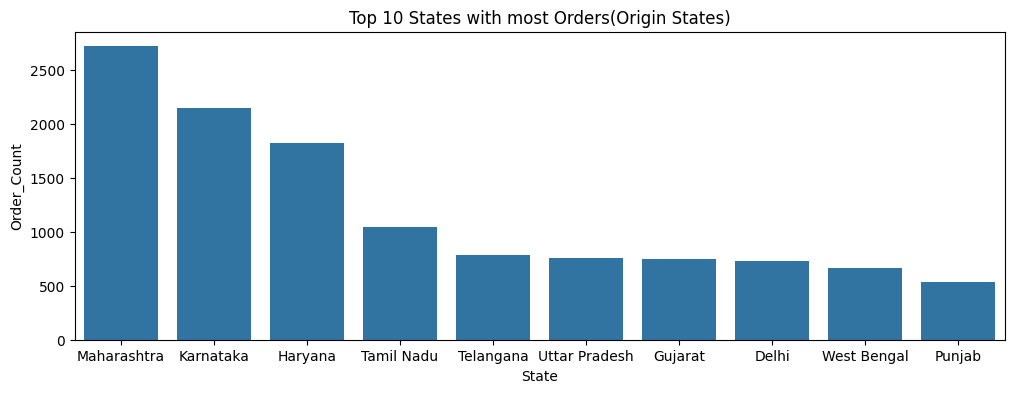

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x='State', y='Order_Count', data=state_order_count)
plt.title('Top 10 States with most Orders(Origin States)')
plt.show()

In [ ]:
trip_level_df['destination_state']=trip_level_df['destination_name'].str.split('(').apply(lambda state:state[1]).str.split(')').apply(lambda dummy:dummy[0])

In [ ]:
destination_state_order_count=trip_level_df.groupby('destination_state')['trip_uuid'].nunique().reset_index()
destination_state_order_count

,destination_state,trip_uuid
0,Andhra Pradesh,454
1,Arunachal Pradesh,24
2,Assam,231
3,Bihar,379
4,Chandigarh,68
5,Chhattisgarh,43
6,Dadra and Nagar Haveli,17
7,Daman & Diu,1
8,Delhi,642
9,Goa,44


In [ ]:
destination_state_order_count.columns=['State', 'Order_Count']

In [ ]:
destination_state_order_count=destination_state_order_count.sort_values(by='Order_Count', ascending=False).head(10)
destination_state_order_count

,State,Order_Count
18,Maharashtra,2569
15,Karnataka,2263
11,Haryana,1527
26,Tamil Nadu,1045
29,Uttar Pradesh,822
27,Telangana,815
10,Gujarat,756
31,West Bengal,676
8,Delhi,642
24,Punjab,585


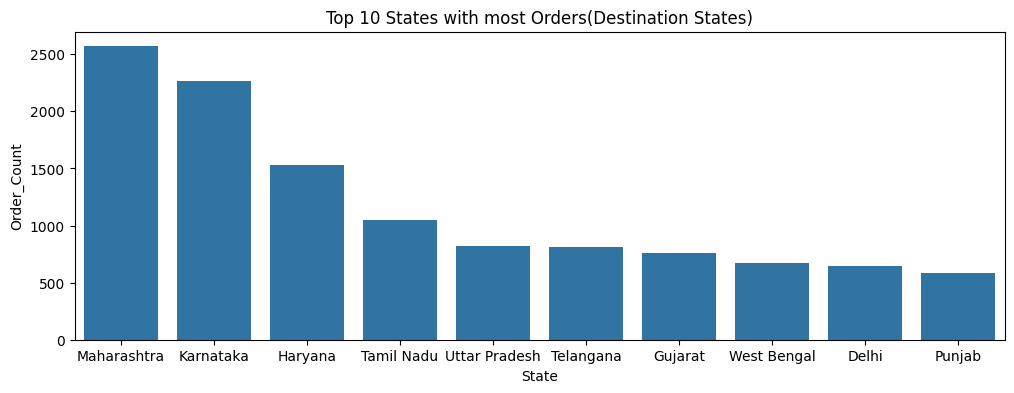

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x='State', y='Order_Count', data=destination_state_order_count)
plt.title('Top 10 States with most Orders(Destination States)')
plt.show()

**Insights:**
* The top 10 states with the most orders represents Delhivery's largest and most active markets.
* States with order volume may indicate areas where customers are willing to pay for premium services.
* High-order volume in certain states could lead to service bottlenecks, increasing delays or missed deliveries.



**Recommendations:**
* More resources can be allocated to the key states, such as increasing warehouse capacity, hiring additional delivery staff and improving infrastructure to handle high demand efficiently.
* Delhivery can introduce premium services like express shipping or better tracking options in high-order regions.
* Monitor and optimize the customer experience in these states by analysing customer feedback and improving support services.

In [ ]:
corridor_orders= trip_level_df.groupby(['source_name', 'destination_name']).size().reset_index(name='order_count')
corridor_orders_sorted= corridor_orders.sort_values(by='order_count', ascending=False)
top10_corridors=corridor_orders_sorted.head(10)
top10_corridors

,source_name,destination_name,order_count
136,Bangalore_Nelmngla_H (Karnataka),Bengaluru_KGAirprt_HB (Karnataka),151
195,Bengaluru_Bomsndra_HB (Karnataka),Bengaluru_KGAirprt_HB (Karnataka),121
209,Bengaluru_KGAirprt_HB (Karnataka),Bangalore_Nelmngla_H (Karnataka),108
1409,Pune_Tathawde_H (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),107
271,Bhiwandi_Mankoli_HB (Maharashtra),Mumbai Hub (Maharashtra),105
134,Bangalore_Nelmngla_H (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),100
1233,Mumbai_Chndivli_PC (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),99
191,Bengaluru_Bomsndra_HB (Karnataka),Bangalore_Nelmngla_H (Karnataka),93
730,Gurgaon_Bilaspur_HB (Haryana),Sonipat_Kundli_H (Haryana),92
212,Bengaluru_KGAirprt_HB (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),86


**Insights:**
* These are the top 10 most active corridors where logistics operations can be optimized.
* Popular Corridors which deals with heavy traffic may need route optimization or capacity expansion to handle the volume.
* High-order corridors may present opportunities for collabration with partners to enhance service efficiency.
* Regions served by top corridors can be targeted for marketing, infrastructure development and resource allocation.
* More transportation/cartage vehicles and staff can be deployed in these active corridors to handle the opeartions and do the deliveries timely.
  



**Recommendations:**
* For Top corridors with heavy demand, dynamic pricing strategies can be implemented. Offering premium delivery services (e.g. express or same-day delivery) for an additional fee can help Delhivery generate more revenue.
* Delhivery can invest in warehousing, sorting centers and distribution hubs along or near top corridors. This can speed up the delivery times and improve overall efficiency.
* For top corridors, Delhivery should evaluate and optimize the delivery routes. This may involve improving fleet management, using dynamic root optimization tools and analyzing traffic patterns.
* Continuously monitor the performance of these top 10 corridors, especially regarding delivery times, customer satisfaction, and package handling



In [ ]:
trip_level_df['corridor']=trip_level_df['source_name']+ ' to ' +trip_level_df['destination_name']

In [ ]:
corridor_stats=trip_level_df.groupby('corridor').agg(total_orders= ('corridor', 'size'), avg_distance=('actual_distance_to_destination', 'mean'), avg_time=('actual_time', 'mean')).reset_index()
bussiest_corridors=corridor_stats.sort_values(by='total_orders', ascending=False).head(10)
bussiest_corridors

,corridor,total_orders,avg_distance,avg_time
136,Bangalore_Nelmngla_H (Karnataka) to Bengaluru_...,151,83.724920,225.218543
195,Bengaluru_Bomsndra_HB (Karnataka) to Bengaluru...,121,134.356936,332.024793
209,Bengaluru_KGAirprt_HB (Karnataka) to Bangalore...,108,82.117928,297.574074
1409,Pune_Tathawde_H (Maharashtra) to Bhiwandi_Mank...,107,3667.927782,6069.794393
271,Bhiwandi_Mankoli_HB (Maharashtra) to Mumbai Hu...,105,50.512046,137.447619
134,Bangalore_Nelmngla_H (Karnataka) to Bengaluru_...,100,123.194523,279.340000
1233,Mumbai_Chndivli_PC (Maharashtra) to Bhiwandi_M...,99,46.520008,159.939394
191,Bengaluru_Bomsndra_HB (Karnataka) to Bangalore...,93,367.434883,686.301075
730,Gurgaon_Bilaspur_HB (Haryana) to Sonipat_Kundl...,92,337.452763,918.880435
212,Bengaluru_KGAirprt_HB (Karnataka) to Bengaluru...,86,132.339583,451.604651


These are the top 10 corridors on the basis of orders count along with the average distance and avgerage time between them.